In [3]:
import os
import shutil


def copy_segmentation_data(data_folder, fcn_folder):
    # Define file patterns
    rgb_pattern = "rgb_*.png"
    segmentation_image_pattern = "semantic_segmentation_*.png"
    segmentation_label_pattern = "semantic_segmentation_labels_*.png"

    # Create the fcn_data directory if it doesn't exist
    fcn_data_folder = os.path.join(fcn_folder, "fcn_data")
    imagesFolder = os.path.join(fcn_data_folder, "images")
    masksFolder = os.path.join(fcn_data_folder, "masks")
    labelsFolder = os.path.join(fcn_data_folder, "labels")

    os.makedirs(fcn_data_folder, exist_ok=True)
    os.makedirs(imagesFolder, exist_ok=True)
    os.makedirs(masksFolder, exist_ok=True)
    os.makedirs(labelsFolder, exist_ok=True)
    counter = 0
    # Copy RGB images
    for file in sorted(os.listdir(data_folder)):
        if file.startswith("rgb_") and file.endswith(".png"):
            shutil.copy(os.path.join(data_folder, file), imagesFolder)
            counter = counter + 1

        if counter == 100:
            break
    counter = 0
    # Copy segmentation images
    for file in sorted(os.listdir(data_folder)):
        if file.startswith("semantic_segmentation_") and file.endswith(".png"):
            shutil.copy(os.path.join(data_folder, file), masksFolder)
            counter = counter + 1

        if counter == 100:
            break
    counter = 0
    # Copy segmentation labels
    for file in sorted(os.listdir(data_folder)):
        if file.startswith("semantic_segmentation_labels_") and file.endswith(".json"):
            shutil.copy(os.path.join(data_folder, file), labelsFolder)
            counter = counter + 1

        if counter == 100:
            break


# Example usage
data_folder = "../data"
fcn_folder = "./"
copy_segmentation_data(data_folder, fcn_folder)

In [ ]:
import os
import json


def read_labels(directory):
    labels = set()  # Use a set to avoid duplicates
    for filename in os.listdir(directory):
        if filename.endswith(".json"):
            with open(os.path.join(directory, filename), "r") as file:
                data = json.load(file)
                for item in data.values():
                    labels.add(item["class"])
    return labels


# Usage
labels_directory = "./fcn_data/labels"
different_labels = read_labels(labels_directory)
print(len(different_labels))

In [ ]:
from PIL import Image

img = Image.open("./fcn_data/images/rgb_0000.png")
mask = Image.open("./fcn_data/masks/semantic_segmentation_0000.png")

In [ ]:
import torch
import numpy as np

torch.tensor(np.array(img)).shape

In [ ]:
torch.tensor(np.array(mask)).shape

# Read all labels

In [2]:
import os
import json

# Directory containing the JSON files
directory = "./fcn_data/labels"
map = {}
# Iterate through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".json"):
        file_path = os.path.join(directory, filename)

        # Load the JSON data
        with open(file_path) as f:
            labels = json.load(f)

        # Create a dictionary to hold class and corresponding color
        class_color_mapping = {value["class"]: key for key, value in labels.items()}

        # Print the class and corresponding color for the current file
        for class_name, color in class_color_mapping.items():
            if class_name not in map.keys():
                map[class_name] = color
            elif color != map[class_name]:
                print("warning")

In [6]:
map

{'BACKGROUND': '(0, 0, 0, 0)',
 'UNLABELLED': '(0, 0, 0, 255)',
 'iwhub': '(25, 255, 82, 255)',
 'dolly': '(25, 82, 255, 255)',
 'pallet': '(255, 25, 197, 255)',
 'rack': '(140, 255, 25, 255)',
 'railing': '(255, 111, 25, 255)',
 'floor': '(226, 255, 25, 255)',
 'forklift': '(255, 197, 25, 255)',
 'crate': '(140, 25, 255, 255)',
 'stillage': '(54, 255, 25, 255)'}

In [3]:
a = {key: value for key, value in map.items()}

In [4]:
new_data = {key: [int(x) for x in value[1:-1].split(",")] for key, value in a.items()}

In [5]:
list(new_data.values())

[[0, 0, 0, 0],
 [0, 0, 0, 255],
 [25, 255, 82, 255],
 [25, 82, 255, 255],
 [255, 25, 197, 255],
 [140, 255, 25, 255],
 [255, 111, 25, 255],
 [226, 255, 25, 255],
 [255, 197, 25, 255],
 [140, 25, 255, 255],
 [54, 255, 25, 255]]

In [8]:
import torch

color_map = torch.tensor(
    [
        [0, 0, 0, 0],
        [25, 82, 255, 255],
        [255, 25, 197, 255],
        [140, 255, 25, 255],
        [0, 0, 0, 255],
        [226, 255, 25, 255],
        [255, 197, 25, 255],
        [140, 25, 255, 255],
        [54, 255, 25, 255],
        [25, 255, 82, 255],
        [255, 111, 25, 255],
    ]
)
color_map = color_map[:, :3]

In [20]:
## Input
### Import libraries
import torch

color_map = torch.tensor(
    [
        [0, 0, 0],
        [25, 82, 255],
        [255, 25, 197],
        [140, 255, 25],
        [0, 0, 0],
        [226, 255, 25],
        [255, 197, 25],
        [140, 25, 255],
        [54, 255, 25],
        [25, 255, 82],
        [255, 111, 25],
    ]
)


def create_color_mapped_images(batch_size, height, width, color_map):
    num_colors = color_map.shape[0]

    # Generate random indices for the color_map
    random_indices = torch.randint(0, num_colors, (batch_size, height, width))

    # Map these indices to colors
    batch_images = color_map[random_indices]

    return batch_images


## Output
### Generate the batch of images
masks = create_color_mapped_images(4, 640, 640, color_map)
print(masks.shape)

torch.Size([4, 640, 640, 3])


In [21]:
import torch


def one_hot_encode_images(masks, color_map):
    batch_size, height, width, _ = masks.shape
    num_colors = color_map.shape[0]

    # Reshape masks and color_map for efficient comparison
    masks_reshaped = masks.view(batch_size, height * width, 1, 3)
    color_map_reshaped = color_map.view(1, 1, num_colors, 3)

    # Compare masks with color_map
    matches = torch.all(masks_reshaped == color_map_reshaped, dim=-1)

    # Create one-hot encoding
    one_hot = torch.zeros(batch_size, height, width, num_colors, dtype=torch.float32)
    one_hot.view(batch_size, height * width, num_colors)[matches] = 1

    return one_hot.permute(0, 3, 2, 1)


# Example usage:
# masks = torch.rand(4, 640, 640, 3)  # Replace with your actual masks
color_map = torch.tensor(
    [
        [0, 0, 0],
        [25, 82, 255],
        [255, 25, 197],
        [140, 255, 25],
        [0, 0, 0],
        [226, 255, 25],
        [255, 197, 25],
        [140, 25, 255],
        [54, 255, 25],
        [25, 255, 82],
        [255, 111, 25],
    ]
)

result = one_hot_encode_images(masks, color_map)
print(result.shape)  # Should be [4, 640, 640, 11]

torch.Size([4, 11, 640, 640])


In [22]:
def map_one_hot_to_image(one_hot, color_map):
    batch_size, height, width, num_colors = one_hot.shape

    # Use argmax to find the index of the 1 in each one-hot vector
    indices = torch.argmax(one_hot, dim=-1)

    # Use the indices to select colors from the color map
    output = color_map[indices]

    return output

In [23]:
import matplotlib.pyplot as plt
from PIL import Image

In [24]:
image = map_one_hot_to_image(result.permute(0, 3, 2, 1), color_map)[1]

In [25]:
image.shape

torch.Size([640, 640, 3])

In [26]:
image

tensor([[[255, 111,  25],
         [255, 197,  25],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [140, 255,  25],
         [ 25,  82, 255]],

        [[255, 111,  25],
         [  0,   0,   0],
         [ 25,  82, 255],
         ...,
         [140, 255,  25],
         [226, 255,  25],
         [ 54, 255,  25]],

        [[  0,   0,   0],
         [255, 111,  25],
         [255, 197,  25],
         ...,
         [255,  25, 197],
         [226, 255,  25],
         [226, 255,  25]],

        ...,

        [[ 25, 255,  82],
         [255, 197,  25],
         [140,  25, 255],
         ...,
         [140, 255,  25],
         [255,  25, 197],
         [ 54, 255,  25]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [255, 197,  25],
         ...,
         [255,  25, 197],
         [140, 255,  25],
         [ 25, 255,  82]],

        [[255,  25, 197],
         [255, 111,  25],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
        

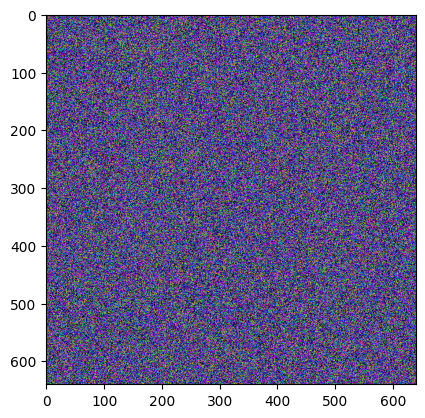

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your tensor is named 'image_tensor'

# Convert the tensor to a NumPy array and permute the dimensions
image_numpy = image.numpy()

# Ensure pixel values are in the range [0, 255]
image_numpy = (image_numpy * 255).astype(np.uint8)

# Plot the image
plt.imshow(image_numpy)
plt.show()

In [1]:
from fcn import FCN

model = FCN(3, 11)
# x=torch.randn(1,640,640,3)
# print(model(x))
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Sample image tensor
images = torch.randn(1, 1280, 720, 3)
masks = torch.randn(1, 1280, 720, 3)
resize = transforms.Resize((640, 640))

masks = masks.to(device)


images = images.to(device)
masks = masks.to(device)
image = images.permute(0, 3, 2, 1)
images = resize(image)
images = images.permute(0, 3, 2, 1)

masks = masks.permute(0, 3, 2, 1)
masks = resize(masks)
masks = masks.permute(0, 3, 2, 1)
print(f"masks:{masks.shape}")
print(f"images:{images.shape}")

output = model(images)

masks:torch.Size([1, 640, 640, 3])
images:torch.Size([1, 640, 640, 3])


In [2]:
output[0, :, 234, 639]

tensor([ 0.0332,  0.0237,  0.0253,  0.0224, -0.0130, -0.0136, -0.0375, -0.0244,
        -0.0364,  0.0361,  0.0082], grad_fn=<SelectBackward0>)